In [33]:
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt

In [34]:

def conv2d(x, W):
    """conv2d returns a 2d convolution layer with full stride."""
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')


def max_pool_2x2(x):
    """max_pool_2x2 downsamples a feature map by 2X."""
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1],
                          strides=[1, 2, 2, 1], padding='SAME')


def weight_variable(shape, name=None):
    """weight_variable generates a weight variable of a given shape."""
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial, name=name)


def bias_variable(shape, name=None):
    """bias_variable generates a bias variable of a given shape."""
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial, name=name)

In [35]:
W_conv1 = weight_variable([5, 5, 1, 8])
b_conv1 = bias_variable([8])

W_conv2 = weight_variable([5, 5, 8, 32])
b_conv2 = bias_variable([32])

W_fc1 = weight_variable([24 * 24 * 32 + 192, 100])
b_fc1 = bias_variable([100])

W_fc2 = weight_variable([100, 99])
b_fc2 = bias_variable([99])

In [38]:
saver = tf.train.Saver({'Variable': W_conv1, 'Variable_2': W_conv2})
# Restore variables from disk.
sess = tf.Session()
saver.restore(sess, "../models/combined_model/best_combined_model.ckpt")

INFO:tensorflow:Restoring parameters from ../models/combined_model/best_combined_model.ckpt


Show W_conv1: 
(5, 5, 1, 8)


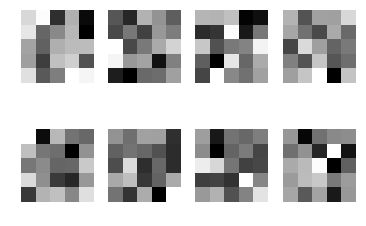

In [40]:
print("Show W_conv1: ")
conv1 = W_conv1.eval(sess)
print(conv1.shape)
_, plts = plt.subplots(2, 4)
for j in range(8):
    plts[j // 4][j % 4].axis('off')
    plts[j // 4][j % 4].imshow(conv1[:, :, 0, j], 'gray')
plt.show()

Show W_conv2: 
(5, 5, 8, 32)


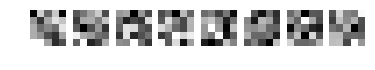

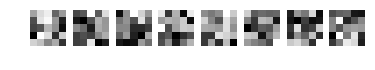

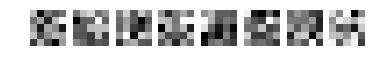

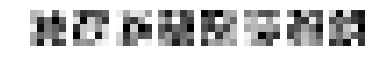

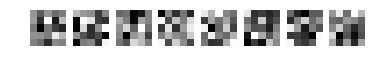

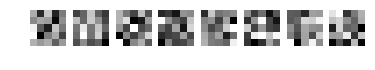

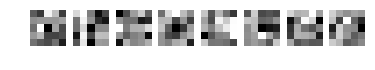

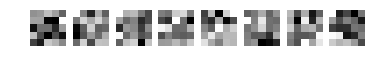

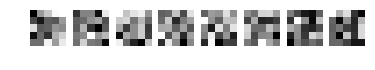

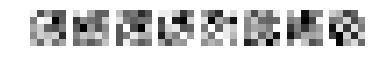

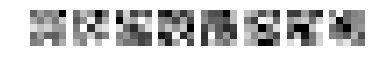

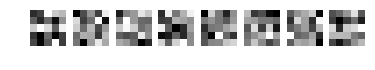

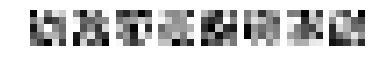

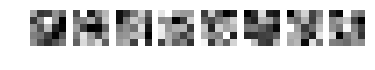

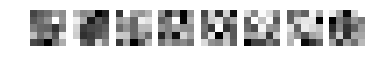

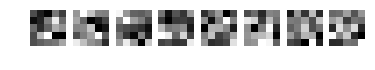

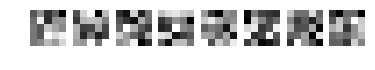

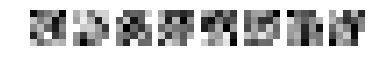

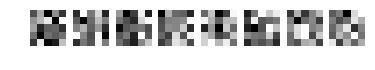

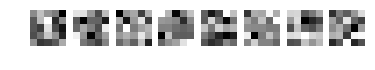

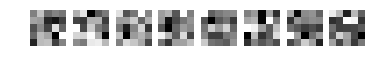

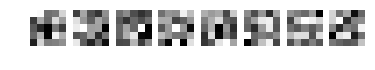

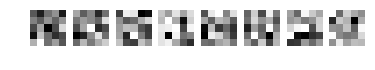

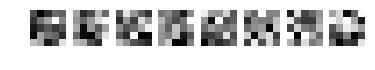

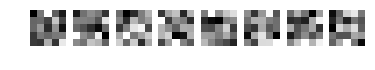

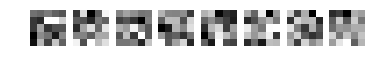

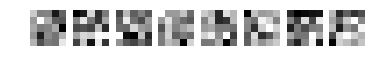

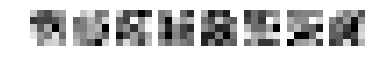

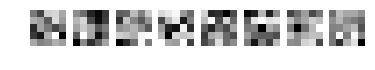

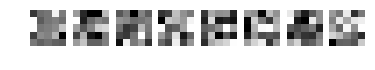

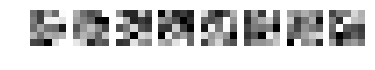

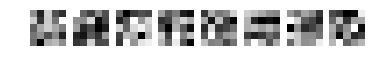

In [43]:
print("Show W_conv2: ")
conv2 = W_conv2.eval(sess)
print(conv2.shape)
for i in range(32):
    _, plts = plt.subplots(1, 8)
    for j in range(8):
        plts[j].axis('off')
        plts[j].imshow(conv2[:, :, j, i], 'gray')
    plt.show()